<a href="https://colab.research.google.com/github/DeepaliSaini4/Machine-Learning/blob/main/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Housing.csv to Housing.csv
Mean Squared Error: 0.06
R-squared Score: 0.67
                            Feature  Coefficient
0                              area     0.000048
1                          bedrooms     0.020279
2                         bathrooms     0.186955
3                           stories     0.082593
4                          mainroad     0.111925
5                         guestroom     0.053951
6                          basement     0.099003
7                   hotwaterheating     0.130089
8                   airconditioning     0.157919
9                           parking     0.036906
10                         prefarea     0.125728
11  furnishingstatus_semi-furnished     0.001132
12     furnishingstatus_unfurnished    -0.109355


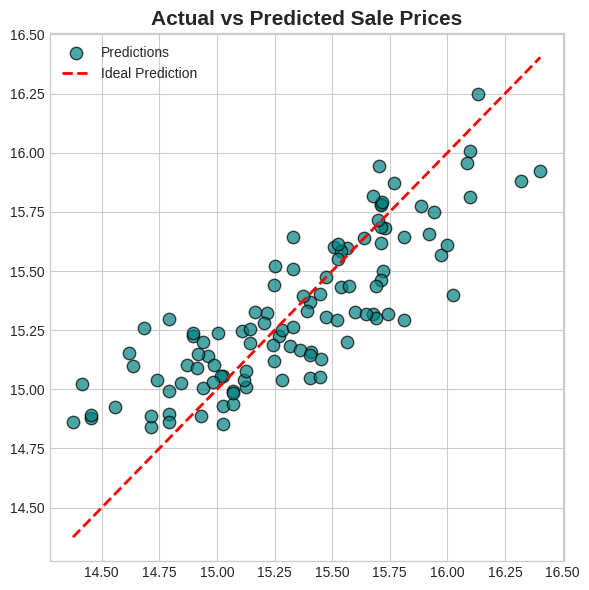

In [2]:
# 1 - Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 2 - Upload the Dataset to Colab
from google.colab import files
uploaded = files.upload()

# 3 - Load the Dataset
dataset = pd.read_csv('Housing.csv')

# 4 - Encode Binary Categorical Variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dataset[binary_cols] = dataset[binary_cols].replace({'yes': 1, 'no': 0})

# 5 - One-Hot Encode 'furnishingstatus'
dataset = pd.get_dummies(dataset, columns=['furnishingstatus'], drop_first=True)

# 6 - Feature and Target Separation
X = dataset.drop('price', axis=1)
y = dataset['price']

# 7 - Log Transform the Target Variable
y = np.log(y)

# 8 - Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9 - Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 10 - Make Predictions
y_pred = model.predict(X_test)

# 11 - Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 12 - Print Evaluation Metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# 13 - Display Model Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)

# 14 - Plot: Actual vs Predicted Sale Prices
plt.figure(figsize=(6, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='teal', alpha=0.7, edgecolors='k', s=80, label='Predictions')

# Diagonal red line (perfect prediction line)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')
plt.title('Actual vs Predicted Sale Prices', fontsize=15, weight='bold')

# Move labels towards corners
plt.gca().xaxis.set_label_coords(1.05, -0.02)
plt.gca().yaxis.set_label_coords(-0.07, 1.01)

# Add legend
plt.legend()

# Tweak layout and show
plt.tight_layout()
plt.show()






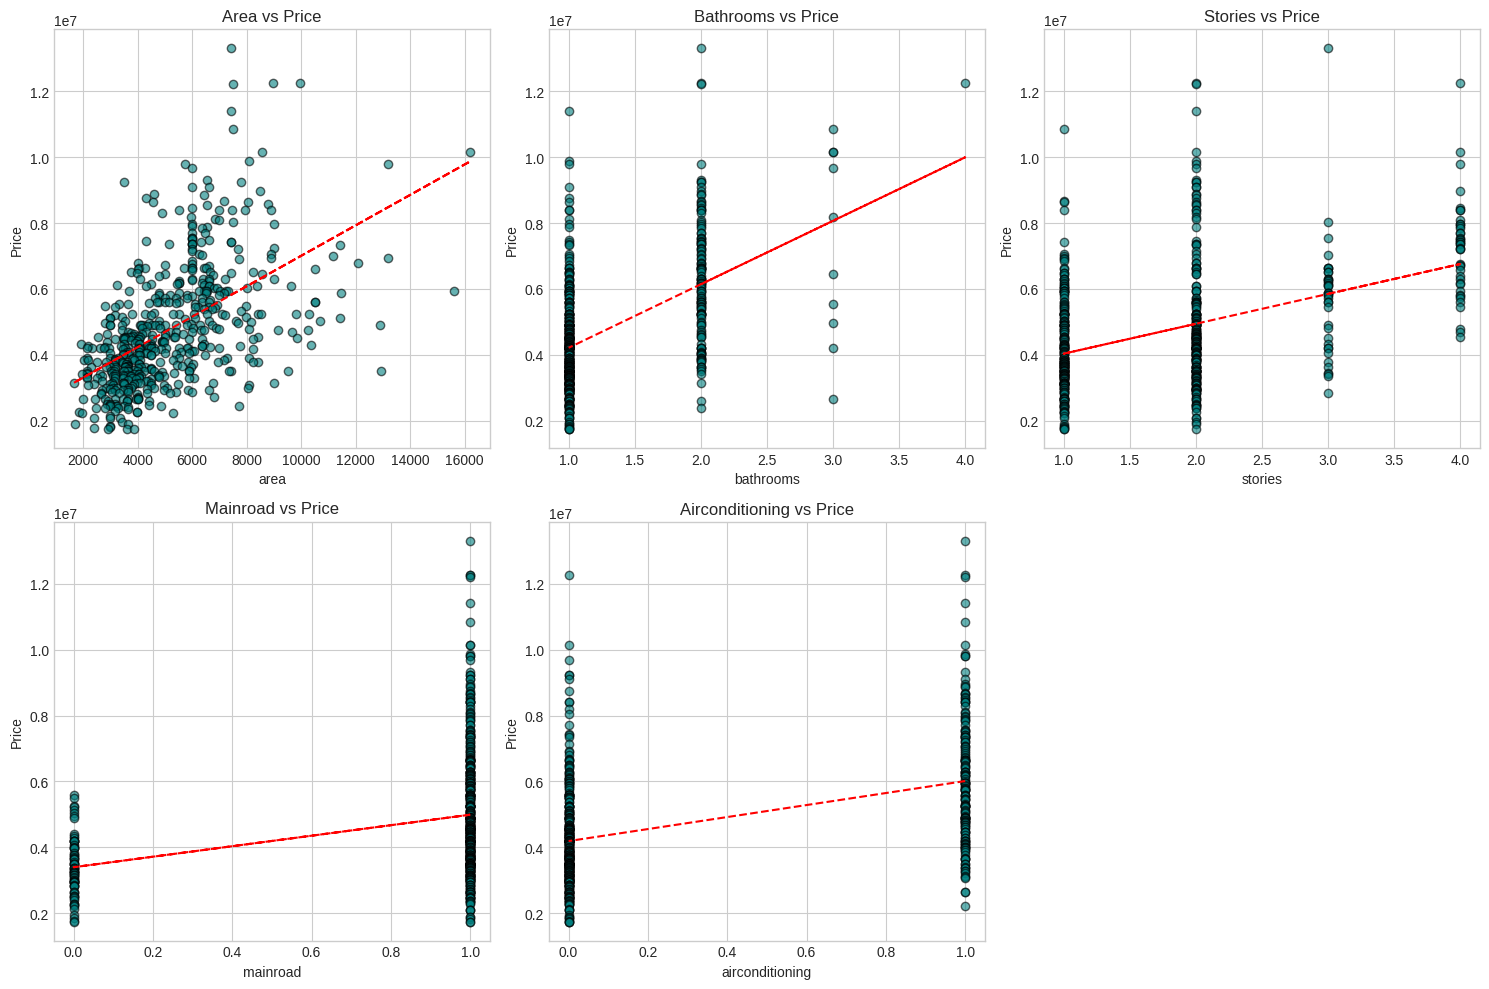

In [3]:

# Create multiple scatter plots to analyze feature-price relationships
plt.figure(figsize=(15, 10))

# Choose important numerical features based on coefficients
important_features = ['area', 'bathrooms', 'stories', 'mainroad', 'airconditioning']

for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(dataset[feature], np.exp(y), color='teal', alpha=0.6, edgecolors='k')

    # Add trend line
    z = np.polyfit(dataset[feature], np.exp(y), 1)
    p = np.poly1d(z)
    plt.plot(dataset[feature], p(dataset[feature]), "r--")

    plt.title(f'{feature.capitalize()} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()
